In [32]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pickle
from tqdm import tqdm_notebook
import joblib
import os
import uproot

In [33]:
import rawio.IO as io
from scdmsPyTools.Traces.Filtering import *
from scdmsPyTools.Traces.Noise import *
from scdmsPyTools.TES.Templates import *
from scdmsPyTools.Traces.Stats import *
#from scdmsPyTools.BatTools.IO import *
from rawio import IO

In [34]:
#procdir = "/gpfs/slac/staas/fs1/g/supercdms/tf/nexus/midasdata/NEXUS/R7/processed/auto_proc/OFResults_"
#procdir = "/gpfs/slac/staas/fs1/g/supercdms/tf/nexus/midasdata/NEXUS/R7/processed/master_releases/v2.0.0/OFResults_"
rawdir = "/data/chocula/k100/midasraw/byseries/"
procdir = "/gpfs/slac/staas/fs1/g/supercdms/tf/umn/rq/"
series='07240822_1514/'
series2='07240822_1303/'
procseries='07191122_0915/'

In [35]:
events=io.getRawEvents(rawdir,series)
events2=io.getRawEvents(rawdir,series2)

The file is: /data/chocula/k100/midasraw/byseries//07240822_1514/07240822_1514_F0001.mid.gz

Opened raw midas file: /data/chocula/k100/midasraw/byseries//07240822_1514/07240822_1514_F0001.mid.gz
The file is: /data/chocula/k100/midasraw/byseries//07240822_1514/07240822_1514_F0002.mid.gz

Opened raw midas file: /data/chocula/k100/midasraw/byseries//07240822_1514/07240822_1514_F0002.mid.gz
The file is: /data/chocula/k100/midasraw/byseries//07240822_1514/07240822_1514_F0003.mid.gz

Opened raw midas file: /data/chocula/k100/midasraw/byseries//07240822_1514/07240822_1514_F0003.mid.gz
The file is: /data/chocula/k100/midasraw/byseries//07240822_1514/07240822_1514_F0004.mid.gz

Opened raw midas file: /data/chocula/k100/midasraw/byseries//07240822_1514/07240822_1514_F0004.mid.gz
The file is: /data/chocula/k100/midasraw/byseries//07240822_1514/07240822_1514_F0005.mid.gz

Opened raw midas file: /data/chocula/k100/midasraw/byseries//07240822_1514/07240822_1514_F0005.mid.gz
The file is: /data/chocul

In [36]:
type(events)

pandas.core.frame.DataFrame

In [37]:
events.keys()

MultiIndex([('Z1', 'QI'),
            ('Z1', 'QO'),
            ('Z1', 'PA'),
            ('Z1', 'PB'),
            ('Z1', 'PC'),
            ('Z1', 'PD'),
            ('Z3', 'QI'),
            ('Z3', 'QO'),
            ('Z3', 'PA'),
            ('Z3', 'PB'),
            ('Z3', 'PC'),
            ('Z3', 'PD'),
            ('Z4', 'QI'),
            ('Z4', 'QO'),
            ('Z4', 'PA'),
            ('Z4', 'PB'),
            ('Z4', 'PC'),
            ('Z4', 'PD')],
           )

In [38]:
num = events['Z3']['PA'].keys()[0][0]
num2 = events2['Z4']['PA'].keys()[0][0]

In [39]:
events['Z3']['PA'][num]

10000    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
10001    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
10002    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
10003    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
10004    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                               ...                        
99219    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
99220    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
99221    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
99222    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
99223    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: PA, Length: 3008, dtype: object

for x in events['Z4']['PA'][num].keys():
    if set(events['Z4']['PA'][num][x]) != {0}: print(x)

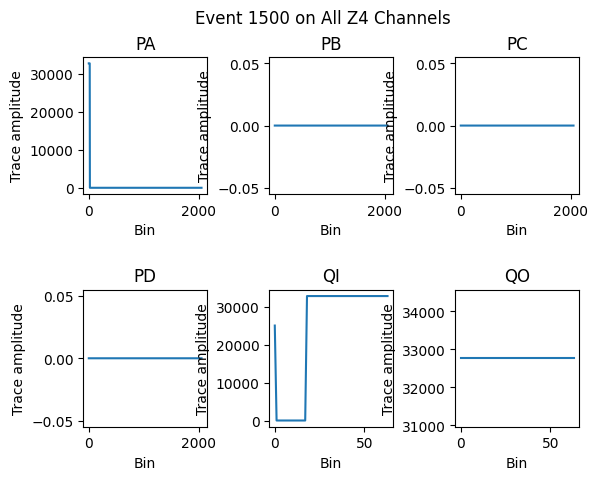

In [40]:
channels=['PA','PB','PC','PD','QI','QO']

fig = plt.figure()
fig.subplots_adjust(hspace=0.7, wspace=0.5)

zip = 'Z4'

for j,channel in enumerate(channels):
    plt.subplot(2,3,j+1)
    plt.plot(events[zip][channel][num][82596]) # index 0 corresponds to first event
    plt.title(channel)
    plt.xlabel('Bin')
    plt.ylabel('Trace amplitude')

plt.suptitle('Event 1500 on All '+zip+' Channels')
plt.show()

82580 0
82581 0
82582 0
82583 0
82584 0
82585 0
82586 0
82587 0
82588 0
82589 0
82590 0
82591 0
82592 0
82593 0
82594 0
82595 0
82596 0
82838 530
82839 530
82840 530
82841 530
82842 530
82843 530
82844 530
82845 530
82846 530
82847 530
82848 530
82849 530
82850 530
82851 530
82852 530
82853 530
82854 530
83094 1170
83095 1170
83096 1170
83097 1170
83098 1170
83099 1170
83100 1170
83101 1170
83102 1170
83103 1170
83104 1170
83105 1170
83106 1170
83107 1170
83108 1170
83350 1810
83351 1810
83352 1810
83353 1810
83354 1810
83355 1810
83356 1810
83357 1810
83358 1810
83359 1810
83360 1810
83468 1810
85911 0
85912 0
85913 0
85914 0
85915 0
85916 0
85917 0
85918 0
85919 0
86166 0
86167 530
86168 530
86169 530
86396 530
86422 519
86423 1170
86424 1170
86425 1170
86426 1170
86427 1170
86428 1170
86429 1170
86430 1170
86431 1170
86432 1170
86562 1170
86678 1159
86679 1810
86680 1810
86681 1810
86682 1810
86683 1810
86684 1810
86685 1810
86686 1810
86687 1810
86688 1810
86689 1810
86690 1810
866

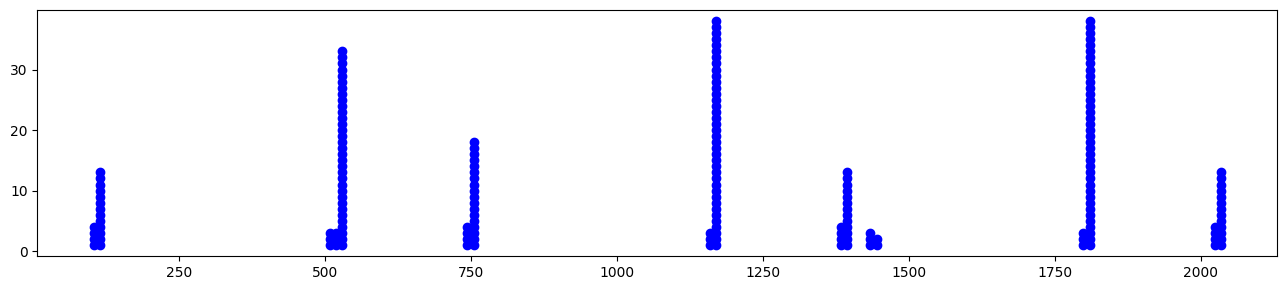

nans: 2746
zeroes: 63


In [41]:
from collections import Counter
list = []
for x in events['Z4']['PA'][num].keys():
    xheight = events['Z4']['PA'][num][x]
    if type(xheight) != np.ndarray:
        xheight = xheight.values[0]
    try:
        list.append(np.where(xheight==32764)[0][0])
        print(x,np.where(xheight==32764)[0][0])
    except IndexError: #it was a flatline
        list.append(np.nan)
#print(list)

#dot plot generation - https://stackoverflow.com/questions/57830130/how-do-i-convert-this-histogram-into-a-dot-plot-dot-chart-using-matplotlib-and-n
z = Counter(list)
ar = 0.2
fig, ax = plt.subplots(figsize=(plt.figaspect(ar)))
for key, value in z.items():
    if key == 0:
        continue
    X = [key] * value
    Y = [item + 1 for item in range(value)]
    plt.scatter(X, Y, color='b')

#plt.ylim(0,25)
plt.show()
print("nans:",z[np.nan])
print("zeroes:",z[0])

KeyError: 1500

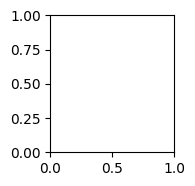

In [42]:
channels2=['PB','PC','PD']

fig = plt.figure()
fig.subplots_adjust(hspace=0.7, wspace=0.5)

for j,channel in enumerate(channels2):
    plt.subplot(2,3,j+1)
    plt.plot(events.Z3[channel][1500]) # index 0 corresponds to first event
    plt.title(channel)
    plt.xlabel('Bin')
    plt.ylabel('Trace amplitude')

plt.suptitle('Event 1500 on All Z3 Channels')
plt.show()

In [ ]:
channels2=['PA','PB']

fig = plt.figure()
fig.subplots_adjust(hspace=0.7, wspace=0.5)

for j,channel in enumerate(channels2):
    plt.subplot(2,3,j+1)
    plt.plot(events.Z4[channel][1500]) # index 0 corresponds to first event
    plt.title(channel)
    plt.xlabel('Bin')
    plt.ylabel('Trace amplitude')

plt.suptitle('Event 1500 on All Z4 Channels')
plt.show()

In [ ]:
plt.figure()

for j in range(1499,1505):
    plt.plot(events.Z1.PA[j]) # iterate over the first 20 events

plt.title('6 Sample Events on Z1PA')
plt.show()

In [ ]:
events['Z1']['PA'][0]

In [ ]:
zips=['Z1','Z3']
channels=['PA','PB','PC','PD']

fig = plt.figure()
fig.subplots_adjust(hspace=0.7, wspace=0.5)
for i,zips in enumerate(zips):
    plt.subplot(2,3,i+1) 
    for j,channel in enumerate(channels):
        plt.subplot(2,3,j+1)
        plt.plot(events[zips][channel][1500],label=zips) # index 0 corresponds to first event
        plt.title(channel)
        plt.xlabel('Bin')
        plt.ylabel('Trace amplitude')

plt.suptitle('event 1500 on All Channels')
plt.legend()
plt.show()

In [ ]:
#Re-map events to actual channels
zips=['Z1','Z3']
channels=['PA','PB','PC','PD']

for zips in (zips):
    for channels in (channels):
        for i in (events[zips][channels]):
            if zips=='Z1':
                if channels=='PA':
                    eventsMap['PE'][i]=dict()
                    eventsMap['PE'][i].append(events[zips][channels][i])
                elif channels=='PB':
                    eventsMap['PB'][i]=dict()
                    eventsMap['PB'][i].append(events[zips][channels][i])
                elif channels=='PC':
                    eventsMap['PD'][i]=dict()
                    eventsMap['PD'][i].append(events[zips][channels][i])
            elif zips=='Z3':
                if channels=='PB':
                    eventsMap['PA'][i]=dict()
                    eventsMap['PA'][i].append(events[zips][channels][i])
                elif channels=='PC':
                    eventsMap['PC'][i]=dict()
                    eventsMap['PC'][i].append(events[zips][channels][i])
                elif channels=='PD':
                    eventsMap['PF'][i]=dict()
                    eventsMap['PF'][i].append(events[zips][channels][i])

In [ ]:
eventsMap['PA']

In [ ]:
for j,channel in enumerate(detchan):
        plt.subplot(2,3,j+1)
        plt.plot(eventsMap[channel][1500]) # index 0 corresponds to first event
        plt.title(channel)
        plt.xlabel('Bin')
        plt.ylabel('Trace amplitude')

plt.suptitle('Event 1500 on All Channels')
plt.legend()
plt.show()

In [ ]:
RQ[1].allkeys()

In [ ]:
PTOFamps=[]
for i in range(1,10):
    PTOFamps.extend(RQ[i]['rqDir/zip1']['PTOFamps'].array()[RQ[i]['rqDir/eventTree']['EventCategory'].array()==0])

In [ ]:
for i in range(11,20):
    PTOFamps.extend(RQ[i]['rqDir/zip1']['PTOFamps'].array()[RQ[i]['rqDir/eventTree']['EventCategory'].array()==0])

In [ ]:
for i in range(21,29):
    PTOFamps.extend(RQ[i]['rqDir/zip1']['PTOFamps'].array()[RQ[i]['rqDir/eventTree']['EventCategory'].array()==0])

In [ ]:
plt.hist(PTOFamps,bins=100,range=[1e-8,1e-6])
plt.yscale('log')

plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

In [ ]:
PFS1OFamps=[]
for i in range(1,10):
    PFS1OFamps.extend(RQ[i]['rqDir/zip1']['PFS1OFamps'].array()[RQ[i]['rqDir/eventTree']['EventCategory'].array()==0])

In [ ]:
for i in range(11,20):
    PFS1OFamps.extend(RQ[i]['rqDir/zip1']['PFS1OFamps'].array()[RQ[i]['rqDir/eventTree']['EventCategory'].array()==0])

In [ ]:
for i in range(21,29):
    PFS1OFamps.extend(RQ[i]['rqDir/zip1']['PFS1OFamps'].array()[RQ[i]['rqDir/eventTree']['EventCategory'].array()==0])

In [ ]:
plt.hist(PFS1OFamps,bins=100,range=[0,1e-6])
plt.yscale('log')

plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

In [ ]:
PFS2OFamps=[]
for i in range(1,10):
    PFS2OFamps.extend(RQ[i]['rqDir/zip1']['PFS2OFamps'].array()[RQ[i]['rqDir/eventTree']['EventCategory'].array()==0])

In [ ]:
for i in range(11,20):
    PFS2OFamps.extend(RQ[i]['rqDir/zip1']['PFS2OFamps'].array()[RQ[i]['rqDir/eventTree']['EventCategory'].array()==0])

In [ ]:
for i in range(21,29):
    PFS2OFamps.extend(RQ[i]['rqDir/zip1']['PFS2OFamps'].array()[RQ[i]['rqDir/eventTree']['EventCategory'].array()==0])

In [ ]:
plt.hist(PFS2OFamps,bins=100,range=[0,1e-6])
plt.yscale('log')

plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))